# How many 911 calls where the caller immediately hung up were made at or near schools in 37209?

In [158]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [159]:
zipcode = gpd.read_file('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Zip Codes (GIS).geojson')

In [160]:
hang_up = pd.read_csv('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2018_.csv')

In [161]:
zipcode.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -..."
1,37027,37,BRENTWOOD,3558.4949049555025,315672.26501464844,"(POLYGON ((-86.719974241412 36.009524281615, -..."
2,37143,29,PEGRAM,7053.537934957626,1901096.087890625,"(POLYGON ((-87.03537311557 36.087623620297, -8..."
3,37143,28,PEGRAM,1197.1070870572601,83126.842468261719,"(POLYGON ((-87.03605109734001 36.095325458066,..."
4,37240,44,NASHVILLE,9240.7969963306841,3146698.6988525391,"(POLYGON ((-86.803254434485 36.149298486807, -..."


In [162]:
hang_up.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201800001046,01/01/2018 09:22:00 AM,20180000899,A,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,800,MURFREESBORO PKE,310A,S,15,8801,36.134,-86.724,"(36.134, -86.724)"
1,PD201800002954,01/01/2018 11:37:00 PM,20180002546,NaN,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,4500,POST RD,125C,W,21,5017,36.128,-86.852,"(36.128, -86.852)"
2,PD201800003049,01/02/2018 12:11:00 AM,20180002858,C,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,200,WILSONIA AV,123C,W,21,5001,36.126,-86.862,"(36.126, -86.862)"
3,PD201800005874,01/02/2018 05:40:00 PM,20180005204,B,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,1800,EASTSIDE AV,227B,E,13,1039,36.168,-86.738,"(36.168, -86.738)"
4,PD201800007725,01/03/2018 05:12:00 AM,20180007078,C,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,1400,HILLMEADE DR,121A,W,21,4903,36.086,-86.902,"(36.086, -86.902)"


In [163]:
hang_up.columns = ['event_no','time','complaint_no',"shift","tencode","tencode_desc","tencode_suff","tencode_suff_desc","disposition","disposition_desc","block","street","unit","sector","zone","RA","lat","long","coordinates"]

In [164]:
hang_up.head()

,event_no,time,complaint_no,shift,tencode,tencode_desc,tencode_suff,tencode_suff_desc,disposition,disposition_desc,block,street,unit,sector,zone,RA,lat,long,coordinates
0,PD201800001046,01/01/2018 09:22:00 AM,20180000899,A,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,800,MURFREESBORO PKE,310A,S,15,8801,36.134,-86.724,"(36.134, -86.724)"
1,PD201800002954,01/01/2018 11:37:00 PM,20180002546,NaN,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,4500,POST RD,125C,W,21,5017,36.128,-86.852,"(36.128, -86.852)"
2,PD201800003049,01/02/2018 12:11:00 AM,20180002858,C,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,200,WILSONIA AV,123C,W,21,5001,36.126,-86.862,"(36.126, -86.862)"
3,PD201800005874,01/02/2018 05:40:00 PM,20180005204,B,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,1800,EASTSIDE AV,227B,E,13,1039,36.168,-86.738,"(36.168, -86.738)"
4,PD201800007725,01/03/2018 05:12:00 AM,20180007078,C,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,1400,HILLMEADE DR,121A,W,21,4903,36.086,-86.902,"(36.086, -86.902)"


In [165]:
hang_up['geometry'] = hang_up.apply(lambda x: Point((float(x.long), float(x.lat))), axis=1)

In [166]:
hang_up.head()

,event_no,time,complaint_no,shift,tencode,tencode_desc,tencode_suff,tencode_suff_desc,disposition,disposition_desc,block,street,unit,sector,zone,RA,lat,long,coordinates,geometry
0,PD201800001046,01/01/2018 09:22:00 AM,20180000899,A,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,800,MURFREESBORO PKE,310A,S,15,8801,36.134,-86.724,"(36.134, -86.724)",POINT (-86.72399999999999 36.134)
1,PD201800002954,01/01/2018 11:37:00 PM,20180002546,NaN,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,4500,POST RD,125C,W,21,5017,36.128,-86.852,"(36.128, -86.852)",POINT (-86.852 36.128)
2,PD201800003049,01/02/2018 12:11:00 AM,20180002858,C,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,200,WILSONIA AV,123C,W,21,5001,36.126,-86.862,"(36.126, -86.862)",POINT (-86.86200000000001 36.126)
3,PD201800005874,01/02/2018 05:40:00 PM,20180005204,B,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,1800,EASTSIDE AV,227B,E,13,1039,36.168,-86.738,"(36.168, -86.738)",POINT (-86.738 36.168)
4,PD201800007725,01/03/2018 05:12:00 AM,20180007078,C,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,1400,HILLMEADE DR,121A,W,21,4903,36.086,-86.902,"(36.086, -86.902)",POINT (-86.902 36.086)


In [167]:
hang_up_geo = gpd.GeoDataFrame(hang_up, crs = zipcode.crs, geometry = hang_up['geometry'])

In [168]:
zip_hang_up = gpd.sjoin(hang_up_geo, zipcode, op = 'within')

In [169]:
zip_hang_up.head()

,event_no,time,complaint_no,shift,tencode,tencode_desc,tencode_suff,tencode_suff_desc,disposition,disposition_desc,...,lat,long,coordinates,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,PD201800001046,01/01/2018 09:22:00 AM,20180000899,A,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,...,36.134,-86.724,"(36.134, -86.724)",POINT (-86.72399999999999 36.134),24,37217,38,NASHVILLE,193903.81381524992,429776982.65673828
18,PD201800020650,01/06/2018 11:23:00 AM,20180018448,A,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,...,36.136,-86.704,"(36.136, -86.704)",POINT (-86.70399999999999 36.136),24,37217,38,NASHVILLE,193903.81381524992,429776982.65673828
37,PD201800056290,01/16/2018 02:57:00 PM,20180050542,A,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,...,36.136,-86.721,"(36.136, -86.721)",POINT (-86.721 36.136),24,37217,38,NASHVILLE,193903.81381524992,429776982.65673828
82,PD201800113794,01/31/2018 02:30:00 PM,20180101928,A,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,...,36.139,-86.698,"(36.139, -86.698)",POINT (-86.69799999999999 36.139),24,37217,38,NASHVILLE,193903.81381524992,429776982.65673828
97,PD201800136516,02/06/2018 02:21:00 PM,20180122242,A,88,Investigate 911 Hang-Up Call,P,PROGRESS,13,FALSE CALL,...,36.139,-86.698,"(36.139, -86.698)",POINT (-86.69799999999999 36.139),24,37217,38,NASHVILLE,193903.81381524992,429776982.65673828


In [170]:
zip_hang_up[['zip', 'event_no']].groupby('zip').agg('count').sort_values(by ='event_no', ascending = False)

,event_no
zip,
37203,88
37207,82
37013,65
37228,40
37208,40
37211,38
37205,36
37209,35
37218,32


In [171]:
calls37209 = zip_hang_up.loc[zip_hang_up['zip'] == '37209']

In [172]:
calls37209.dtypes

event_no              object
time                  object
complaint_no           int64
shift                 object
tencode                int64
tencode_desc          object
tencode_suff          object
tencode_suff_desc     object
disposition            int64
disposition_desc      object
block                  int64
street                object
unit                  object
sector                object
zone                   int64
RA                     int64
lat                  float64
long                 float64
coordinates           object
geometry              object
index_right            int64
zip                   object
objectid              object
po_name               object
shape_stlength        object
shape_starea          object
dtype: object

In [173]:
zip_poly = zipcode.loc[zipcode.zip == '37209']

In [174]:
zip_poly.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
32,37209,15,NASHVILLE,314940.31315319991,1001700482.1606445,"(POLYGON ((-86.975432896783 36.208771485895, -..."


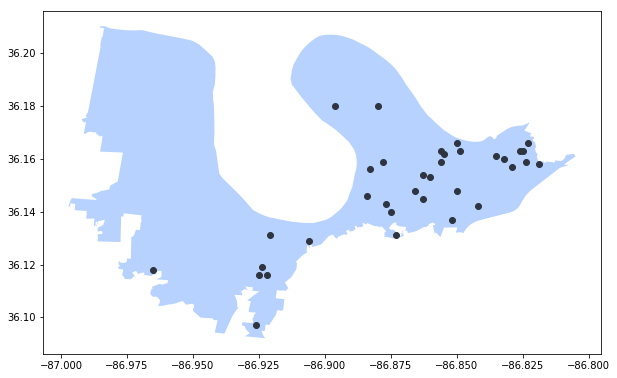

In [175]:
ax = zip_poly.plot(figsize = (10, 10), color = '#B7D2FF')
calls37209.plot( ax = ax, legend = True, color = '#2E3540');

In [176]:
zip_poly.geometry.centroid

32    POINT (-86.91821799264839 36.15606236312596)
dtype: object

In [177]:
start = [36.15, -86.85]

In [178]:
map_37209 = folium.Map(location = start, zoom_start = 14)
map_37209

In [179]:
folium.GeoJson(zip_poly).add_to(map_37209)

for row in calls37209.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['long']]
    popup = (str(row_values['block']) + ' ' + 
             str(row_values['street']))
    marker = folium.Marker(location = location, popup = popup)
    
    marker.add_to(map_37209)


map_37209

In [180]:
schools = pd.read_csv('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Metro_Nashville_Public_School_Locations.csv')

In [181]:
schools.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"


In [184]:
schools.columns = ['SID','name','address','city','state','zip','phone','SSID','type','lowest_grade','highest_grade','lat','lng','website',"cluster","coordinates"]

In [185]:
schools['geometry'] = schools.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

In [132]:
schools_geo = gpd.GeoDataFrame(schools, crs = zipcode.crs, geometry = schools['geometry'])

In [186]:
schools37209 = schools_geo.loc[schools_geo['zip'] == 37209]

In [191]:
folium.GeoJson(zip_poly).add_to(map_37209)

for row in schools37209.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['name']) + ', ' + 
             str(row_values['type']))
    marker = folium.Marker(location = location, popup = popup,icon=folium.Icon(color='green'))
    
    marker.add_to(map_37209)

map_37209

# Only two calls were made from addreses matching schools in 37209 - Gower Elem and Nashville Prep.